In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:

!ls "/content/drive/My Drive/GW_Dataset_2023"

Dataset_low  dir.zip


In [3]:
!unzip '/content/drive/My Drive/GW_Dataset_2023/dir.zip' -d '/content/drive/My Drive/GW_Dataset_2023/Dataset_low/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/02549_HG_2_1_0.08_n20_p05.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/24037_HG_4_1_0.14_n03_p12.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/06706_HG_2_1_0.02_p19_p02.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/06979_HG_3_1_0.15_n10_n02.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/23405_HG_3_1_0.17_n10_n04.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/25802_HG_4_1_0.13_p10_p19.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/13030_HG_0_1_0.01_n12_p04.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1/27860_HG_1_1_0.19_n16

In [18]:
import os
len(os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_5'))

0

In [19]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
m_class_0_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_0')
m_class_1_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_1')
m_class_2_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_2')
m_class_3_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_3')
m_class_4_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_4')
m_class_5_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_5')

img_file = cv2.imread(os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_1',m_class_1_file_names[0]))
print(img_file.shape)
plt.imshow(img_file)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# Define constants
image_height = 128
image_width = 128
batch_size = 256
num_classes = 5
epochs = 10

In [29]:
# Data paths
train_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 24002 images belonging to 5 classes.
Found 5998 images belonging to 5 classes.


In [ ]:
# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# # Save the trained model
# model.save('multi_class_image_classification_model.h5')

In [ ]:
model.save('m_mode_2_class_image_classification_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


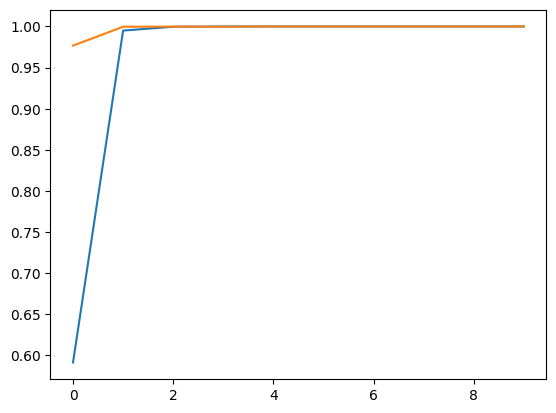

In [32]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

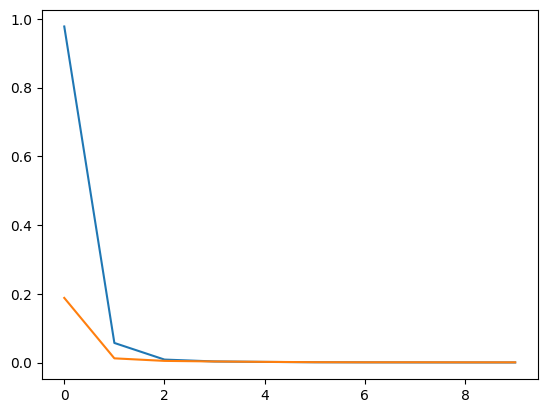

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
def preprocess_image(img_path):
    img_array = cv2.imread(img_path)

    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [35]:
img_path = os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/class_0',m_class_0_file_names[5000])
img_arr = preprocess_image(img_path)
# Make predictions
predictions = model.predict(img_arr)
# predicted_class = np.argmax(predictions)
predictions

1/1 [==============================] - 1s 526ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [36]:
# Data paths
test_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/m_modes_5/'

# Data preprocessing and augmentation
test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [37]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 30000 images belonging to 6 classes.


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
test_generator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [40]:
# Make predictions on test data
num_samples = test_generator.samples
y_true = test_generator.labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

118/118 [==============================] - 218s 2s/step
Confusion Matrix:
[[5884   89    0    0   82]
 [1931 3438  239   23  406]
 [1443  735 2819  397  599]
 [1432  104  881 2715  832]
 [1417  119  118 1051 3246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.97      0.65      6055
           1       0.77      0.57      0.65      6037
           2       0.69      0.47      0.56      5993
           3       0.65      0.46      0.53      5964
           4       0.63      0.55      0.58      5951

    accuracy                           0.60     30000
   macro avg       0.64      0.60      0.60     30000
weighted avg       0.64      0.60      0.60     30000



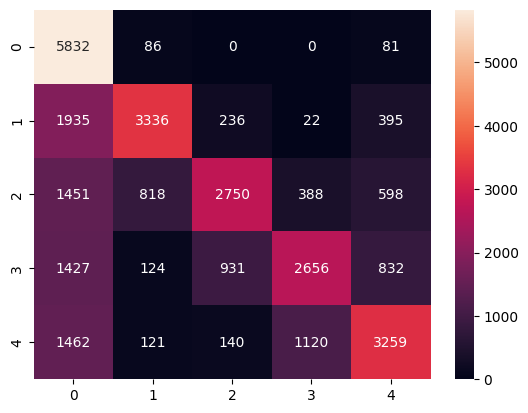

In [57]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

N Mode Classification Network

In [ ]:
!unzip '/content/drive/My Drive/GWDATASET/n_dataset.zip' -d '/content/drive/My Drive/GWDATASET/'

In [44]:
import os
len(os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1'))

5924

(128, 128, 3)


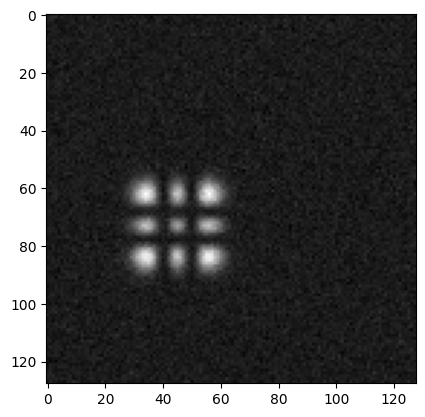

In [45]:
n_class_0_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_0')
n_class_1_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_1')
n_class_2_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_2')
n_class_3_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_3')
n_class_4_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_4')
n_class_5_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_5')

img_file = cv2.imread(os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/class_2',n_class_2_file_names[1]))
print(img_file.shape)
plt.imshow(img_file)

In [46]:
# Data paths
n_train_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/'

# Data preprocessing and augmentation
n_train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [47]:
n_train_generator = n_train_datagen.flow_from_directory(
    n_train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

n_validation_generator = n_train_datagen.flow_from_directory(
    n_train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 24002 images belonging to 6 classes.
Found 5998 images belonging to 6 classes.


In [48]:
# Create CNN model
n_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
n_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_n = n_model.fit(
    n_train_generator,
    steps_per_epoch=n_train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=n_validation_generator,
    validation_steps=n_validation_generator.samples // batch_size
)

# # Save the trained model
# model.save('multi_class_image_classification_model.h5')

Epoch 1/10
93/93 [==============================] - 282s 3s/step - loss: 1.3382 - accuracy: 0.3908 - val_loss: 0.8095 - val_accuracy: 0.6379
Epoch 2/10
93/93 [==============================] - 252s 3s/step - loss: 0.6349 - accuracy: 0.7170 - val_loss: 0.5352 - val_accuracy: 0.7605
Epoch 3/10
93/93 [==============================] - 214s 2s/step - loss: 0.3960 - accuracy: 0.8318 - val_loss: 0.3952 - val_accuracy: 0.8188
Epoch 4/10
93/93 [==============================] - 213s 2s/step - loss: 0.2688 - accuracy: 0.9000 - val_loss: 0.1711 - val_accuracy: 0.9460
Epoch 5/10
93/93 [==============================] - 222s 2s/step - loss: 0.1262 - accuracy: 0.9632 - val_loss: 0.0822 - val_accuracy: 0.9808
Epoch 6/10
93/93 [==============================] - 219s 2s/step - loss: 0.0711 - accuracy: 0.9813 - val_loss: 0.0530 - val_accuracy: 0.9873
Epoch 7/10
93/93 [==============================] - 251s 3s/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.0504 - val_accuracy: 0.9876
Epoch 8/10
93

In [ ]:
n_model.save('n_mode_2_class_image_classification_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


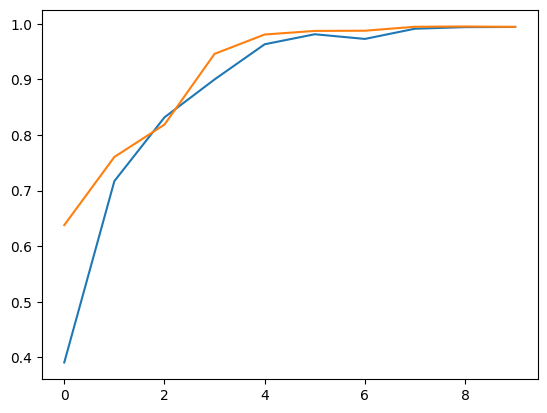

In [49]:
print(history_n.history.keys())
plt.plot(history_n.history['accuracy'])
plt.plot(history_n.history['val_accuracy'])

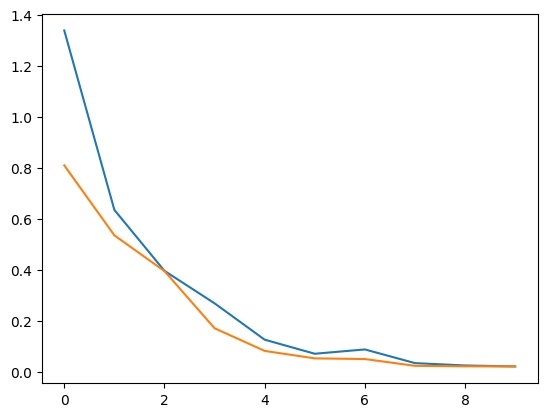

In [50]:
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])

In [ ]:
# for file_name in n_class_0_file_names:
#     img_path = os.path.join('/content/drive/My Drive/GWDATASET/n_dataset/class_0',file_name)
#     img_arr = preprocess_image(img_path)
#     print(model.predict(img_arr))

In [ ]:
file_name = n_class_0_file_names[4579]
img_path = os.path.join('/content/drive/My Drive/GWDATASET/n_dataset/class_0',file_name)
print(file_name)
img_arr = preprocess_image(img_path)
img_file = cv2.imread(img_path)
plt.imshow(img_file)
# Make predictions
predictions_m = model.predict(img_arr)
predictions_n = n_model.predict(img_arr)
# predicted_class = np.argmax(predictions)
print(predictions_m)
print(predictions_n)

In [52]:
#Data paths
n_test_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_low/GWDS/n_modes_5/'

# Data preprocessing and augmentation
n_test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [53]:
n_test_generator = n_test_datagen.flow_from_directory(
    n_test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 30000 images belonging to 6 classes.


In [54]:
# Make predictions on test data
num_samples = n_test_generator.samples
y_true_n = n_test_generator.labels
y_pred_n = n_model.predict(n_test_generator)
y_pred_classes_n = np.argmax(y_pred, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_n, y_pred_classes_n)

# Compute precision, recall, and F1-score
report = classification_report(y_true_n, y_pred_classes_n)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

118/118 [==============================] - 209s 2s/step
Confusion Matrix:
[[5832   86    0    0   81]
 [1935 3336  236   22  395]
 [1451  818 2750  388  598]
 [1427  124  931 2656  832]
 [1462  121  140 1120 3259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.97      0.64      5999
           1       0.74      0.56      0.64      5924
           2       0.68      0.46      0.55      6005
           3       0.63      0.44      0.52      5970
           4       0.63      0.53      0.58      6102

    accuracy                           0.59     30000
   macro avg       0.63      0.59      0.59     30000
weighted avg       0.63      0.59      0.59     30000



# New Section

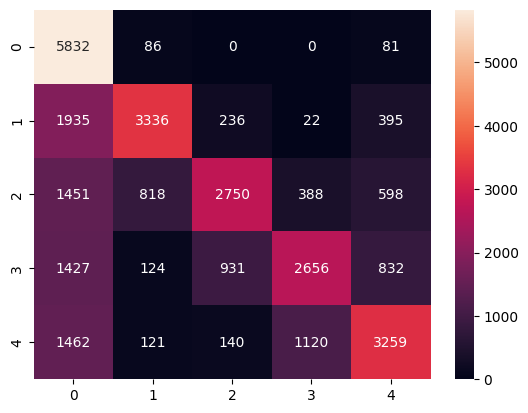

In [56]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()